In [ ]:
# Wine Classification using K-Nearest Neighbors (KNN)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Load the wine dataset, it is built in so no external file needed
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
class_names = wine.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}



In [ ]:
# Create KNN Classifier
knn = KNeighborsClassifier()

# Perform Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test_scaled)



Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}



--- KNN Classifier Performance ---
Accuracy: 0.9815
Precision: 0.9824
F1 Score: 0.9815


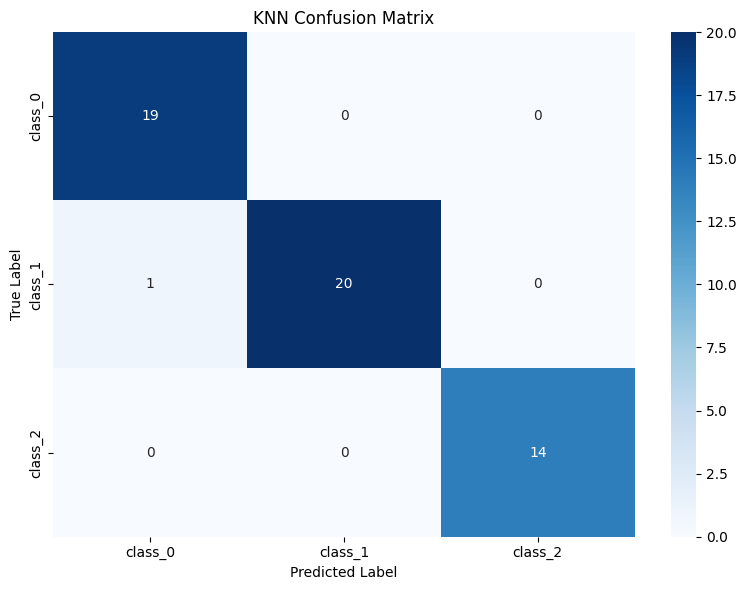


Detailed Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report)
print("\n--- KNN Classifier Performance ---")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

